In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [18]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy
import seaborn as sns
from mlxtend.preprocessing import minmax_scaling


class Plots:
    """
    A class for plotting data of a pandas dataframe.
    ------------------------------------------------

    Parameters:
    -----------
    - dataframe (pd.DataFrame): the dataset to be plotted

    Methods:
    --------
    * single_boxplot(): single boxplot
    * mutli_boxplot(): multiple grouped boxplots
    * line_plot(): line plot
    * scatter_plot(): scatter plot
    * single_histogram(): single histogram of one entry
    * correlation_heatmap(): linear correlation heatmap across all entries
    * correlation_data(): correlation data set
    * group_correlation(): grouped linear correlation heatmap
    * lmplot(): linear regression plot trough a scatter plot
    * scatter_heatmap(): scatter plot with a thrid dimensional entry to create a heatmap

    """

    def __init__(self, dataframe: pd.DataFrame):
        self.dataframe = dataframe

    def _set_plot_style(self, **kwargs):
        """
        Set common styling elements for the plots

        Parameters:
        -----------
            **kwargs: Keyword arguments to set the style elements of the plot.
                      Supported arguments: title, title_fontsize, x_title, x_fontsize,
                      xticks_fontsize, y_title, y_fontsize, yticks_fontsize, length, height,
                      outliers (bool): Whether to show outliers in the plot.
        """
        plt.figure(figsize=(kwargs.get("length", 6), kwargs.get("height", 6)))
        plt.title(kwargs.get("title", ""))
        plt.xlabel(kwargs.get("x_title", ""))
        plt.ylabel(kwargs.get("y_title", ""))
        sns.set_theme()
        sns.set_style("darkgrid", {"axes.facecolor": ".9"})
        sns.despine(top=False, right=False, left=False, bottom=False)
        plt.tight_layout()

    def single_boxplot(self, x_value: str, outliers: bool = True, **kwargs):
        """
        Create a single box plot

        Parameters:
        -----------
            * x_value (str): The column name or variable to be plotted on the x-axis
            * outliers (bool, optional): Show outliers of the boxplot. Default is True
        """

        self._set_plot_style(**kwargs)
        sns.boxplot(self.dataframe[x_value], orient="v", showfliers=outliers)
        plt.show()

    def multi_boxplot(self, x_value: str, y_value: str, hue: str = None, outliers: bool = False, **kwargs):
        """
        Generate a multi-group boxplot.

        Parameters:
        -----------
            * x_value (str): The name of the column in the dataframe to be used as the x-axis variable
            * y_value (str): The name of the column in the dataframe to be used as the y-axis variable
            * hue (str, optional):  The name of the column in the dataframe used to group the data to create boxplots
            * outliers (bool, optional): Determines whether to show outliers in the boxplots. Defaults to False
        """
        self._set_plot_style(**kwargs)
        sns.boxplot(x=x_value, y=y_value, hue=hue, data=self.dataframe, showfliers=outliers)
        plt.ylim(kwargs.get("y_bot"), kwargs.get("y_top"))
        plt.show()

    def line_plot(self, x_value: str, y_value: str, **kwargs):
        """
        Create a line plot using the Seaborn library

        Parameters:
        -----------
            * x_value (str): The column name or variable to be plotted on the x-axis
            * y_value (str): The column name or variable to be plotted on the y-axis
        """
        self._set_plot_style(**kwargs)
        sns.lineplot(x=x_value, y=y_value, data=self.dataframe)
        plt.ylim(kwargs.get("y_bot"), kwargs.get("y_top"))
        plt.xlim(kwargs.get("x_bot"), kwargs.get("x_top"))
        plt.show()

    def scatter_plot(self, x_value: str, y_value: str, hue: str = None, **kwargs):
        """
        Create a scatter plot.

        Parameters:
        -----------
            * x_value (str): The column name or variable to be plotted on the x-axis
            * y_value (str): The column name or variable to be plotted on the y-axis
            * hue (str, optional): The column name or variable used for creating a legend. Defaults to None
        """

        self._set_plot_style(**kwargs)
        sns.scatterplot(x=x_value, y=y_value, data=self.dataframe, hue=hue)
        plt.ylim(kwargs.get("y_bot"), kwargs.get("y_top"))
        plt.xlim(kwargs.get("x_bot"), kwargs.get("x_top"))
        plt.show()

    def single_histogram(self, x_value: str, **kwargs):
        """
        Create a single histogram

        Parameters:
        -----------
            * x_value (str): The column name or variable to be plotted on the x-axis
        """

        self._set_plot_style(**kwargs)
        sns.histplot(x=x_value, data=self.dataframe)
        plt.xlim(kwargs.get("x_bot"), kwargs.get("x_top"))
        plt.show()

    def correlation_heatmap(self, corr_method: str = "pearson", round_factor: int = 2, **kwargs):
        """
        Create a linear correlation heatmap

        Parameters:
        -----------
            * corr_method (str, optional): correlation method. Defaults to "pearson"
            * round_factor (int, optional): round factor. Defaults to 2
        """
        data = self.dataframe.select_dtypes(exclude=object)
        cols = data.columns
        fit_data = minmax_scaling(data, columns=cols)
        data_corr = abs(fit_data.corr(method=corr_method).round(round_factor))

        self._set_plot_style(**kwargs)
        mask = np.triu(np.ones_like(fit_data.corr()))
        sns.heatmap(data_corr, annot=True, cmap="crest", mask=mask)
        plt.show()

    def correlation_data(self, corr_method: str = "pearson", round_factor: int = 2) -> pd.DataFrame:
        """
        Create a correlation dataframe

        Parameters:
        -----------
            * corr_method (str, optional): correlation method. Defaults to "pearson"
            * round_factor (int, optional): round factor. Defaults to 2

        Returns:
        --------
            pd.DataFrame: correlation data as a pandas dataframe
        """
        raw_data = self.dataframe
        data_columns = raw_data.columns
        fit_data = minmax_scaling(raw_data, columns=data_columns)
        data_corr = abs(fit_data.corr(method=corr_method).round(round_factor))
        return data_corr

    def group_correlation(self, columns: list, rows: list, corr_method="pearson", round_factor: int = 2, **kwargs):
        """
        Compute and visualize the correlation matrix for a specific group of columns

        Parameters:
        -----------
            * columns (list): The list of column names to include in the correlation matrix.
            * rows (list): The list of row names to exclude from the correlation matrix.
            * corr_method (str, optional): The method used to compute the correlation. Default is 'pearson'.
            * round_factor (int, optional): The number of decimal places to round the correlation values. Default is 2.
        """

        data = self.dataframe.filter(items=columns + rows)
        fit_data = minmax_scaling(data, columns=data.columns)
        data_corr = abs(fit_data.corr(method=corr_method).round(round_factor))

        data_corr = data_corr.drop(columns=rows)
        data_corr = data_corr[len(columns) :]
        self._set_plot_style(**kwargs)
        sns.heatmap(data_corr, annot=True, cmap="crest")
        plt.show()

    def lmplot(self, x_value: str, y_value: str, hue: str = None, **kwargs):
        """
        Scatter plot with regression line

        Parameters:
        -----------
            * x_value (str): Name of the column for the x-axis variable
            * y_value (str): Name of the column for the y-axis variable
            * hue (str, optional): Name of the column for the hue variable. Defaults to None

        """

        length = kwargs.get("length", 6)
        height = kwargs.get("height", 6)
        _, ax = plt.subplots(figsize=(length, height))

        # scatter plot
        if hue is not None:
            unique_hues = self.dataframe[hue].unique()
            for i in unique_hues:
                df_subset = self.dataframe.loc[self.dataframe[hue] == i]
                ax.scatter(df_subset[x_value], df_subset[y_value], label=i, s=kwargs.get("dot_size", 10))
        else:
            ax.scatter(self.dataframe[x_value], self.dataframe[y_value], s=kwargs.get("dot_size", 10))

        # regression line
        x = self.dataframe[x_value]
        y = self.dataframe[y_value]
        slope, intercept, r_value, _, _ = scipy.stats.linregress(x, y)
        ax.plot(x, slope * x + intercept, color="r")

        ax.set_xlabel(x_value)
        ax.set_ylabel(y_value)
        plt.ylim(kwargs.get("y_bot"), kwargs.get("y_top"))
        plt.xlim(kwargs.get("x_bot"), kwargs.get("x_top"))
        plt.tight_layout()

        if hue is not None:
            ax.legend()

        title = f"Linear fit: y = {slope:.2f}x + {intercept:.2f} | R-Value: {r_value:.2f}"
        plt.title(title)
        plt.show()

    def scatter_heatmap(self, x_value: str, y_value: str, z_value: str = None, **kwargs):
        """
        create scatter heatmap

        Parameters:
        -----------
            * x_value (str): Name of the column for the x-axis variable
            * y_value (str): Name of the column for the y-axis variable
            * z_value (str, optional): The name of the column representing the values for the heatmap. Defaults to None.
        """
        x = self.dataframe[x_value]
        y = self.dataframe[y_value]
        length = kwargs.get("length", 6)
        height = kwargs.get("height", 6)

        if z_value is None:
            fig, ax = plt.subplots(figsize=(length, height))
            scatter = ax.scatter(x, y, s=kwargs.get("scatter_size", 1), c="black")
        else:
            z = self.dataframe[z_value]
            fig, ax = plt.subplots(figsize=(length, height))
            scatter = ax.scatter(x, y, s=kwargs.get("heatmap_size", 30), c=z, cmap=kwargs.get("cmap", "YlOrRd"))
            cbar = fig.colorbar(scatter)
            cbar.set_label(z_value)

        ax.set_xlabel(x_value)
        ax.set_ylabel(y_value)
        ax.set_title(kwargs.get("title", ""))

        plt.show()


# Dataset 1

In [19]:
df = pd.read_csv("./data/spotify_songs.csv")

## Erklärung

* Danceability: Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable.

* Energy: Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale. Perceptual features contributing to this attribute include dynamic range, perceived loudness, timbre, onset rate, and general entropy.

* Key: The estimated overall key of the track. Integers map to pitches using standard Pitch Class notation . E.g. 0 = C, 1 = C♯/D♭, 2 = D, and so on. If no key was detected, the value is -1.

* Loudness: The overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track and are useful for comparing relative loudness of tracks. Loudness is the quality of a sound that is the primary psychological correlate of physical strength (amplitude). Values typical range between -60 and 0 db.

* Mode: Mode indicates the modality (major or minor) of a track, the type of scale from which its melodic content is derived. Major is represented by 1 and minor is 0.


* Speechiness: Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks.


* Confidence: A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic.

* Accoustincness: A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic.

* Instrumentalness: Predicts whether a track contains no vocals. "Ooh" and "aah" sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly "vocal". The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content. Values above 0.5 are intended to represent instrumental tracks, but confidence is higher as the value approaches 1.0.

* Liveness: Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live.

* Valence: A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry).

* Tempo: The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration.


In [20]:
df.describe()

,track_popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
count,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000
mean,42.477081,0.654850,0.698619,5.374471,-6.719499,0.565711,0.107068,0.175334,0.084747,0.190176,0.510561,120.881132,225799.811622
std,24.984074,0.145085,0.180910,3.611657,2.988436,0.495671,0.101314,0.219633,0.224230,0.154317,0.233146,26.903624,59834.006182
min,0.000000,0.000000,0.000175,0.000000,-46.448000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4000.000000
25%,24.000000,0.563000,0.581000,2.000000,-8.171000,0.000000,0.041000,0.015100,0.000000,0.092700,0.331000,99.960000,187819.000000
50%,45.000000,0.672000,0.721000,6.000000,-6.166000,1.000000,0.062500,0.080400,0.000016,0.127000,0.512000,121.984000,216000.000000
75%,62.000000,0.761000,0.840000,9.000000,-4.645000,1.000000,0.132000,0.255000,0.004830,0.248000,0.693000,133.918000,253585.000000
max,100.000000,0.983000,1.000000,11.000000,1.275000,1.000000,0.918000,0.994000,0.994000,0.996000,0.991000,239.440000,517810.000000


In [21]:
df.columns

Index(['track_id', 'track_name', 'track_artist', 'track_popularity',
       'track_album_id', 'track_album_name', 'track_album_release_date',
       'playlist_name', 'playlist_id', 'playlist_genre', 'playlist_subgenre',
       'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'duration_ms'],
      dtype='object')

## Analysis

### Most Popular Keys 

In [22]:
labels = {
    0 : "C",
    1 : "C# - Db",
    2 : "D",
    3 : "D# - Eb",
    4: "E",
    5: "F",
    6: "F# - Gb",
    7: "G",
    8: "G# - Ab",
    9: "A",
    10: "A# - Bb",
    11: "B"
}

df["Key - Encoded"] = df["key"].map(labels)

<Axes: xlabel='Key - Encoded'>

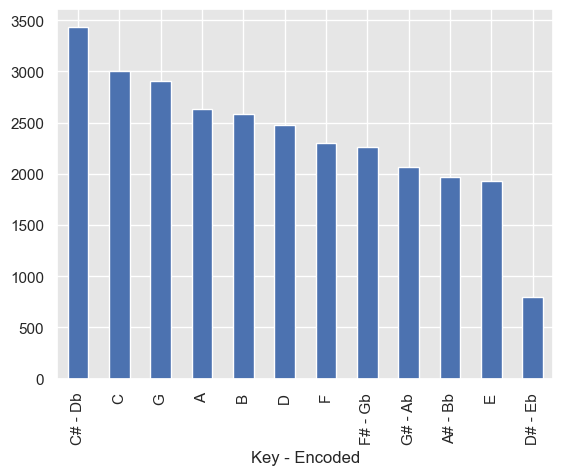

In [23]:
df.groupby(by="Key - Encoded")["track_id"].nunique().sort_values(ascending=False).plot(kind="bar")

### Song Duration

Mean duration:  3.7633301937075503
Median duration:  3.6


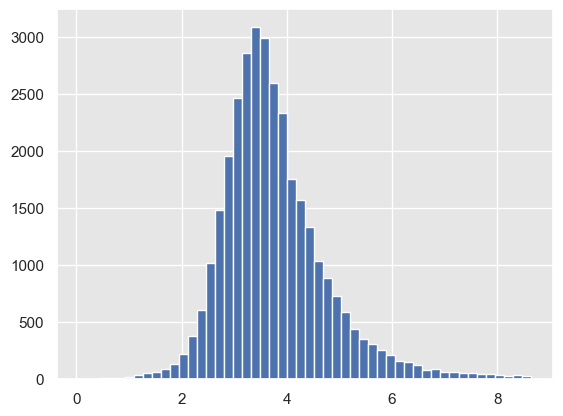

In [24]:
df["duration_min"] = df["duration_ms"] / 60000
df["duration_min"].hist(bins=50)

print("Mean duration: ", df["duration_min"].mean())
print("Median duration: ", df["duration_min"].median())

### Popularity

In [25]:
df.columns

Index(['track_id', 'track_name', 'track_artist', 'track_popularity',
       'track_album_id', 'track_album_name', 'track_album_release_date',
       'playlist_name', 'playlist_id', 'playlist_genre', 'playlist_subgenre',
       'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'duration_ms', 'Key - Encoded', 'duration_min'],
      dtype='object')

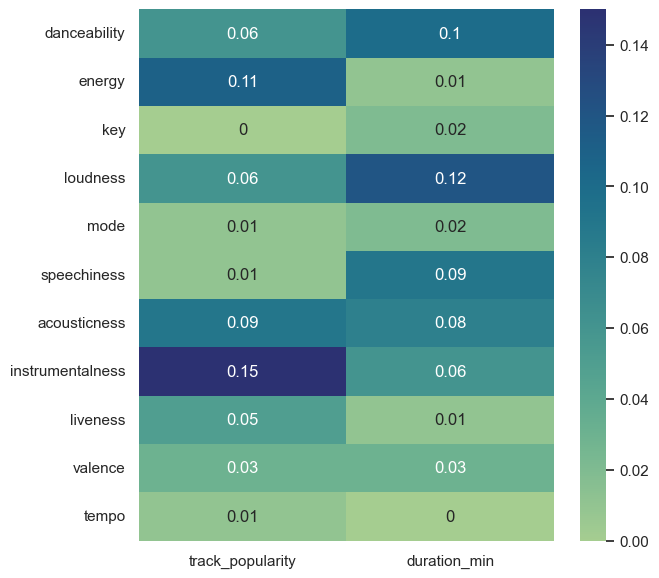

In [26]:
Plots(df).group_correlation(columns=["track_popularity", "duration_min"],
                            rows=['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
                                  'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo'])

### Style

In [27]:
df["year"] = df["track_album_release_date"].str.split("-").str[0].astype(int)
df["decade"] = (df["year"] // 10) * 10

In [28]:
df["year"].unique()

array([2019, 2018, 2017, 2016, 2014, 2012, 2015, 2013, 2011, 2010, 2008,
       2020, 2007, 1998, 1996, 1999, 2009, 1993, 1995, 1991, 2000, 1994,
       1992, 1997, 2001, 2006, 2002, 2003, 2005, 1990, 2004, 1988, 1984,
       1982, 1973, 1979, 1977, 1981, 1974, 1970, 1976, 1987, 1978, 1969,
       1986, 1980, 1983, 1985, 1989, 1975, 1968, 1971, 1972, 1967, 1966,
       1965, 1964, 1963, 1962, 1957, 1958, 1961, 1960])

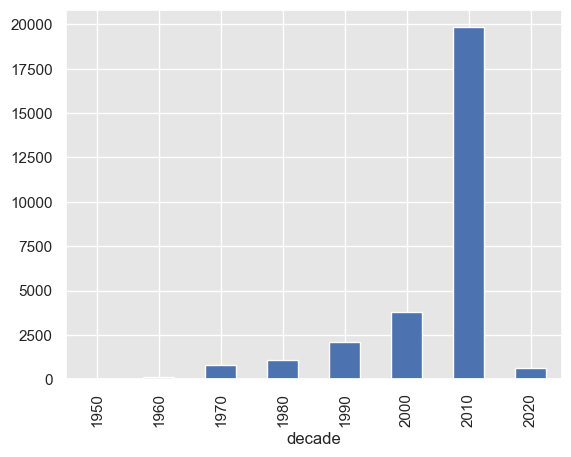

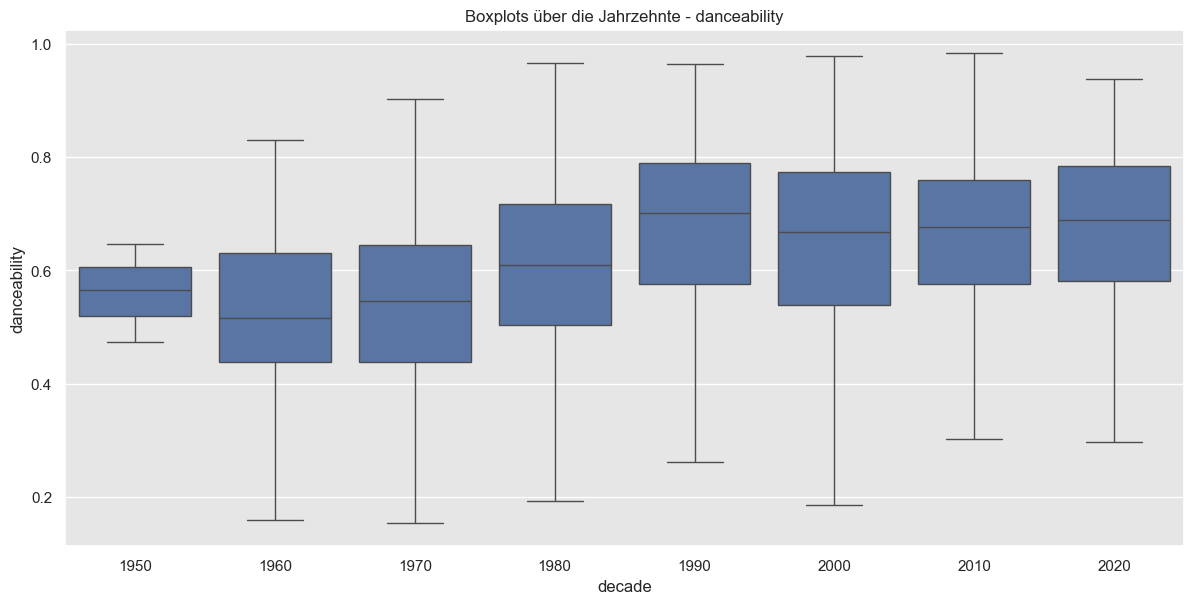

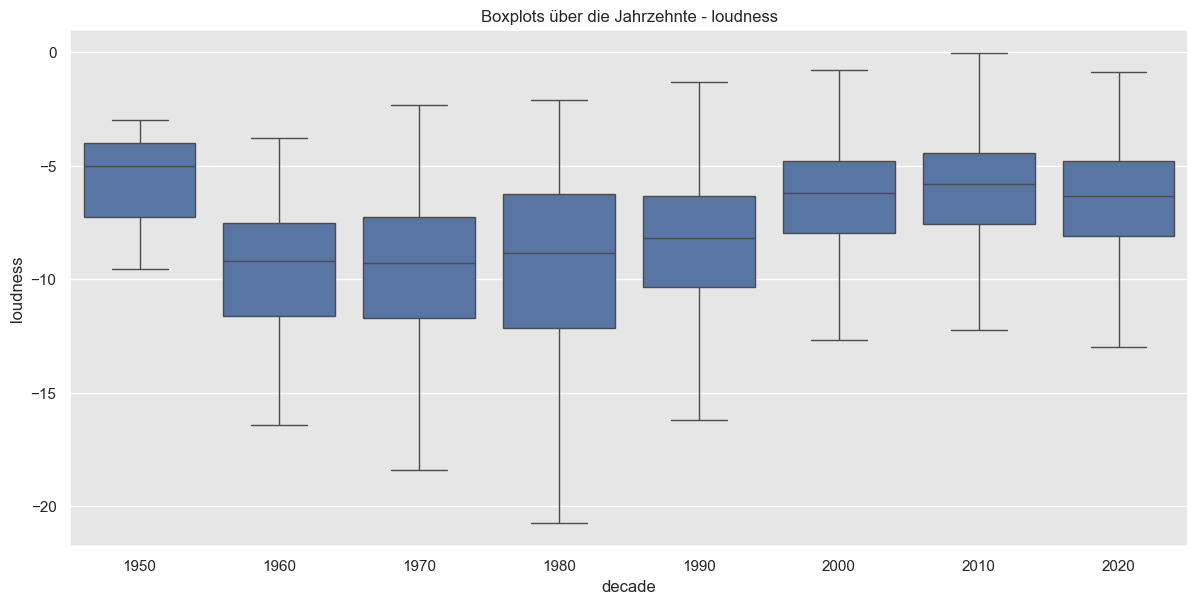

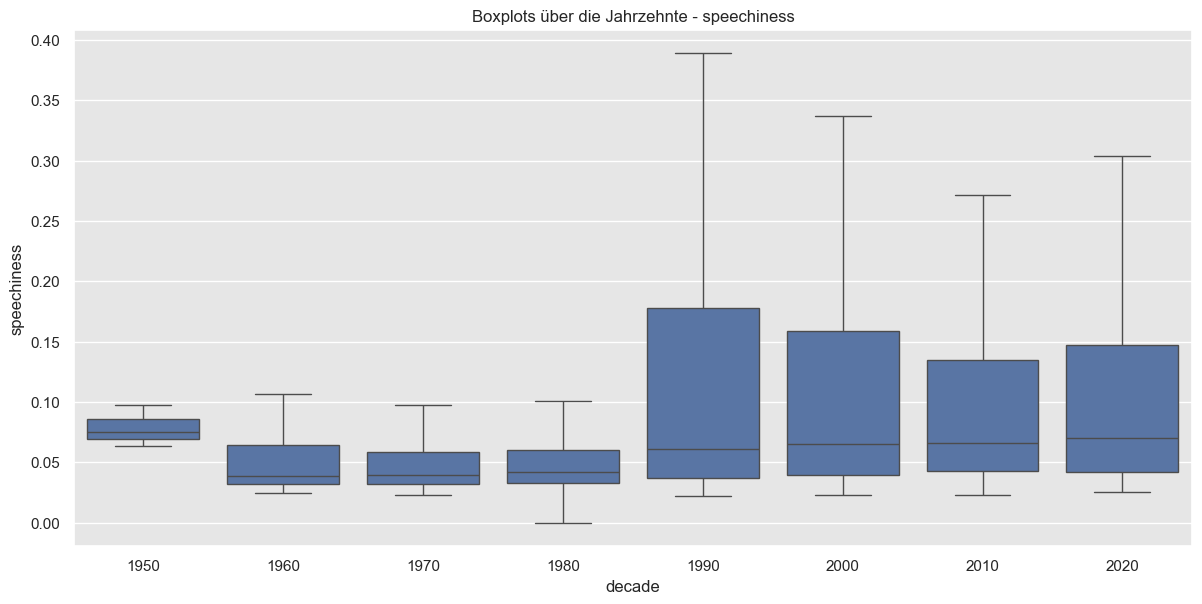

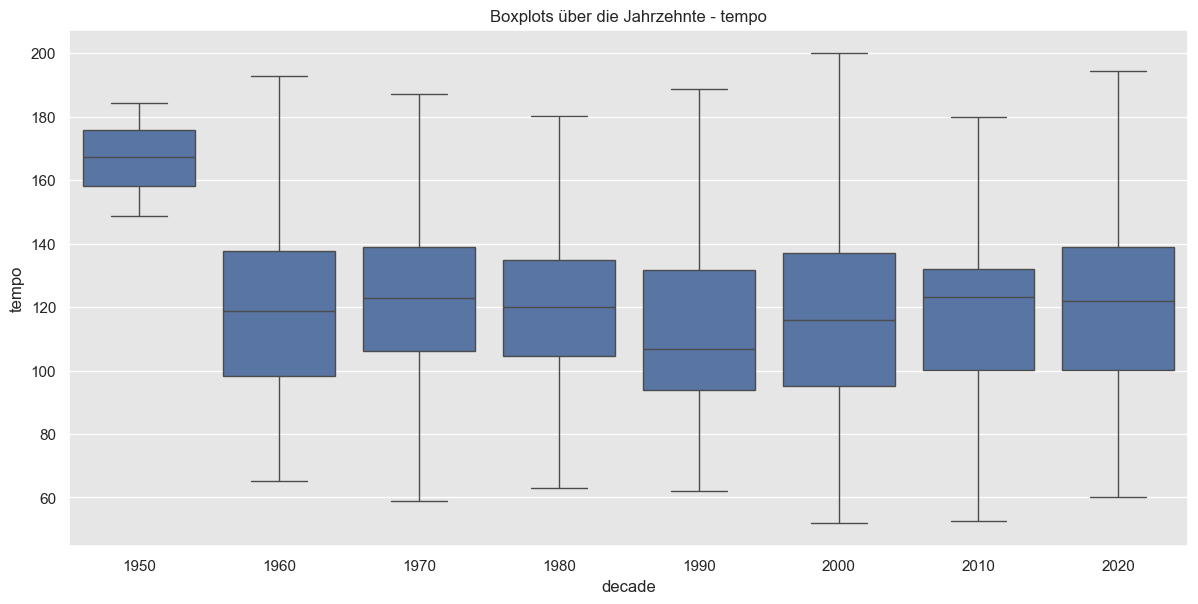

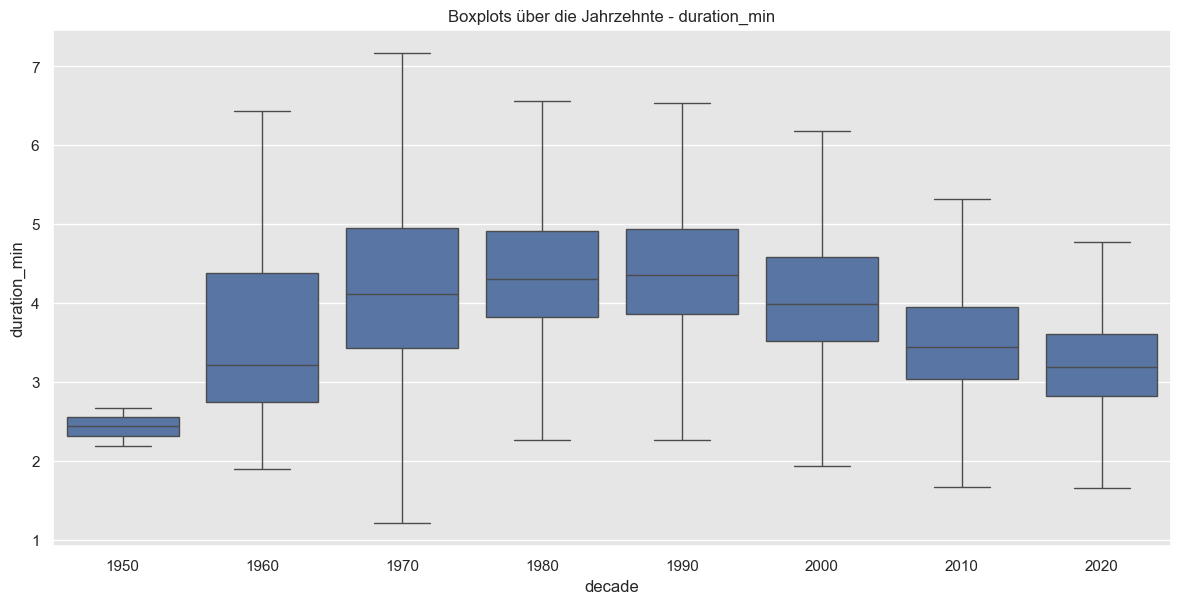

In [29]:
df.groupby(by="decade")["track_id"].nunique().plot(kind="bar")

features = ["danceability", "loudness", "speechiness", "tempo", "duration_min"]

for feature in features:
    Plots(df.loc[~df["year"].isin([0])]).multi_boxplot(x_value="decade", y_value=feature, length=12,
                                                         title=f"Boxplots über die Jahrzehnte - {feature}")

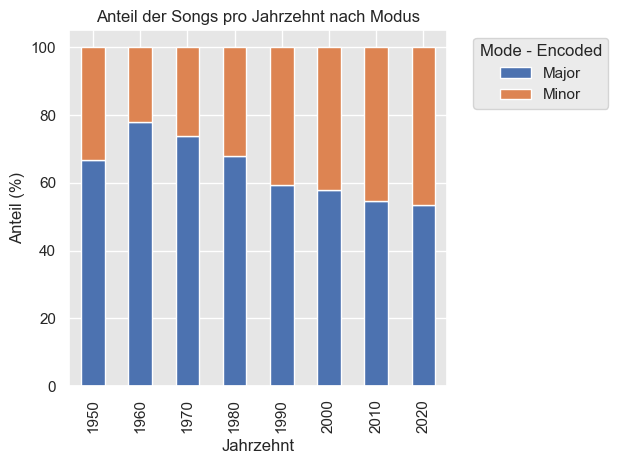

In [30]:
labels = {
    0: "Minor",
    1: "Major"
    
}

df["Mode - Encoded"] = df["mode"].map(labels)

decade_mode_counts = df.loc[~df["decade"].isin([0])].groupby(['decade', 'Mode - Encoded'])['track_id'].nunique().unstack()

decade_mode_percentages = decade_mode_counts.div(decade_mode_counts.sum(axis=1), axis=0) * 100

ax = decade_mode_percentages.plot(kind="bar", stacked=True)
plt.title("Anteil der Songs pro Jahrzehnt nach Modus")
plt.xlabel("Jahrzehnt")
plt.ylabel("Anteil (%)")
ax.legend(title="Mode - Encoded", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


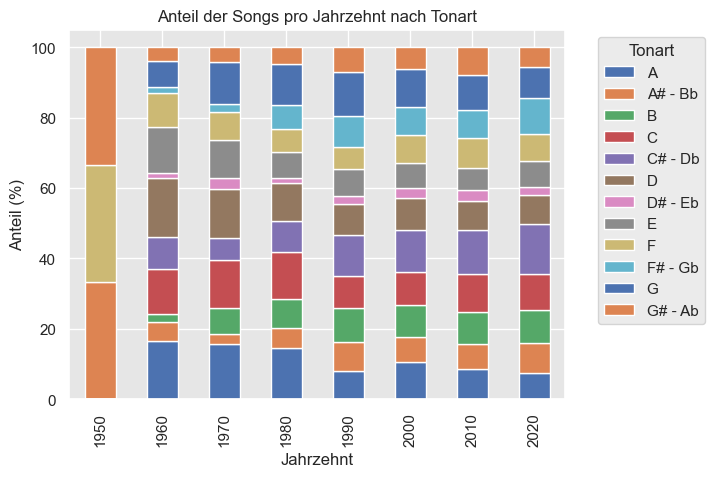

In [31]:
decade_key_counts =  df.loc[~df["decade"].isin([0])].groupby(['decade', 'Key - Encoded'])['track_id'].nunique().unstack()

decade_key_percentages = decade_key_counts.div(decade_key_counts.sum(axis=1), axis=0) * 100

ax = decade_key_percentages.plot(kind="bar", stacked=True)
plt.title("Anteil der Songs pro Jahrzehnt nach Tonart")
plt.xlabel("Jahrzehnt")
plt.ylabel("Anteil (%)")
ax.legend(title="Tonart", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


# Dataset 2

In [32]:
df = pd.read_csv("./data/tracks_features.csv")

In [33]:
labels = {
    0 : "C",
    1 : "C# - Db",
    2 : "D",
    3 : "D# - Eb",
    4: "E",
    5: "F",
    6: "F# - Gb",
    7: "G",
    8: "G# - Ab",
    9: "A",
    10: "A# - Bb",
    11: "B"
}

df["Key - Encoded"] = df["key"].map(labels)

labels = {
    0: "Moll",
    1: "Dur"
    
}

df["Mode - Encoded"] = df["mode"].map(labels)


labels = {
    4.0: "4/4",
    3.0: "3/4",
    5.0: "5/4",
    1.0: "1/4",
    #0.0: "0/0"
    }

df["Time_Signature - Encoded"] = df["time_signature"].map(labels)

df["decade"] = (df["year"] // 10) * 10
df["duration_min"] = df["duration_ms"] / 60000


### Analysis: time/decades analysis

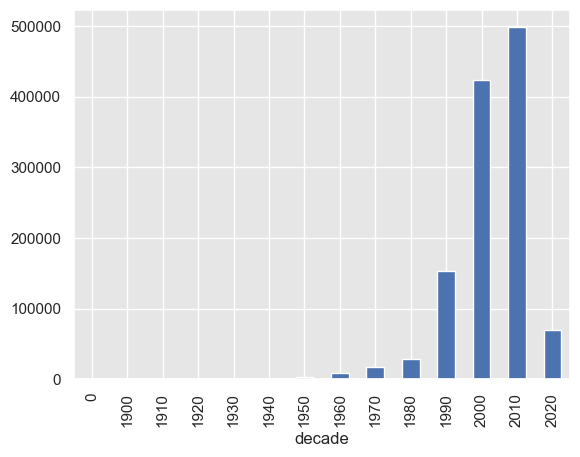

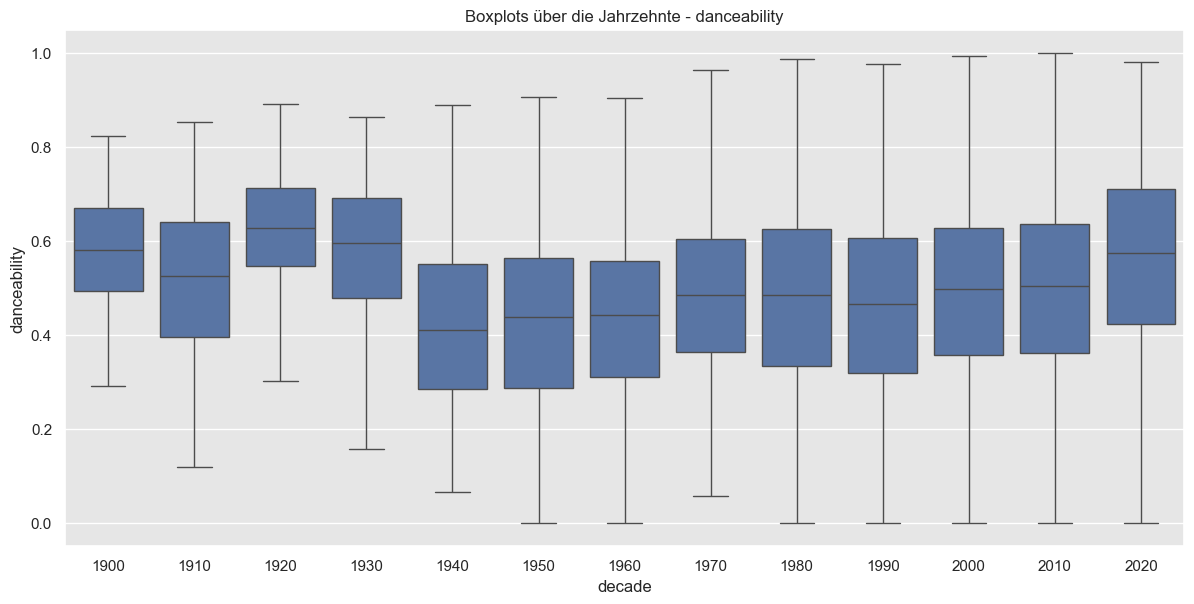

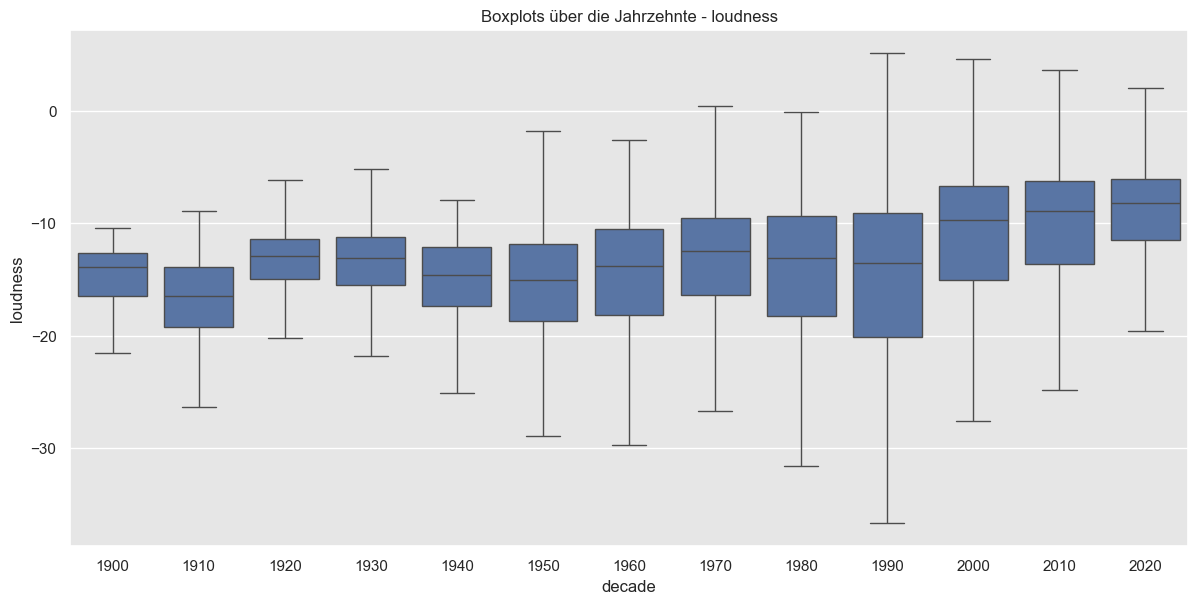

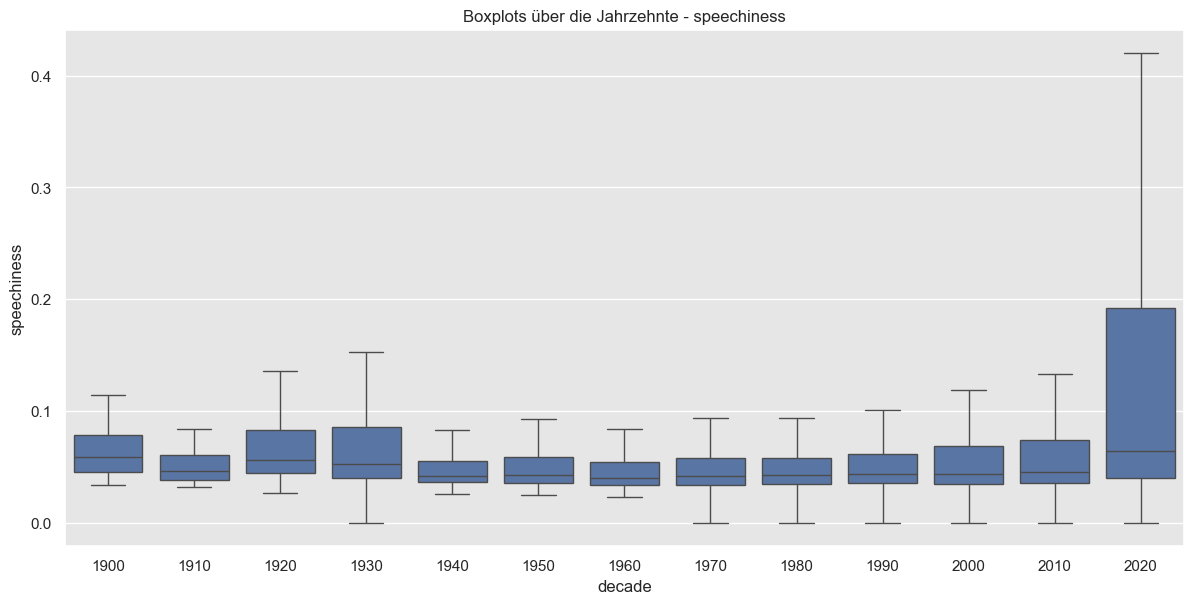

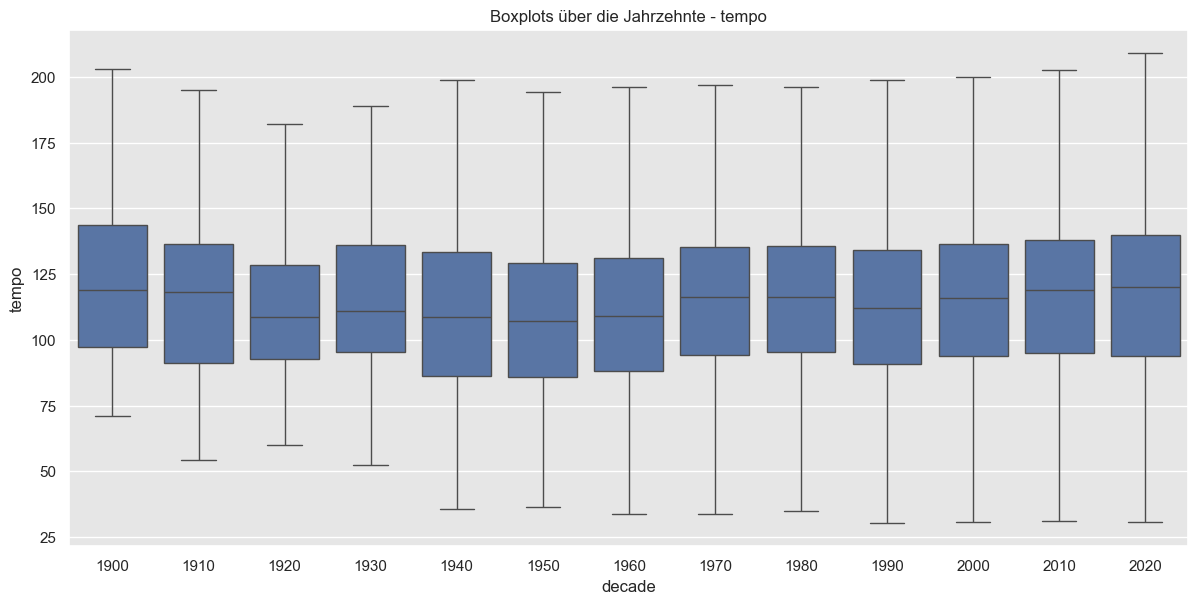

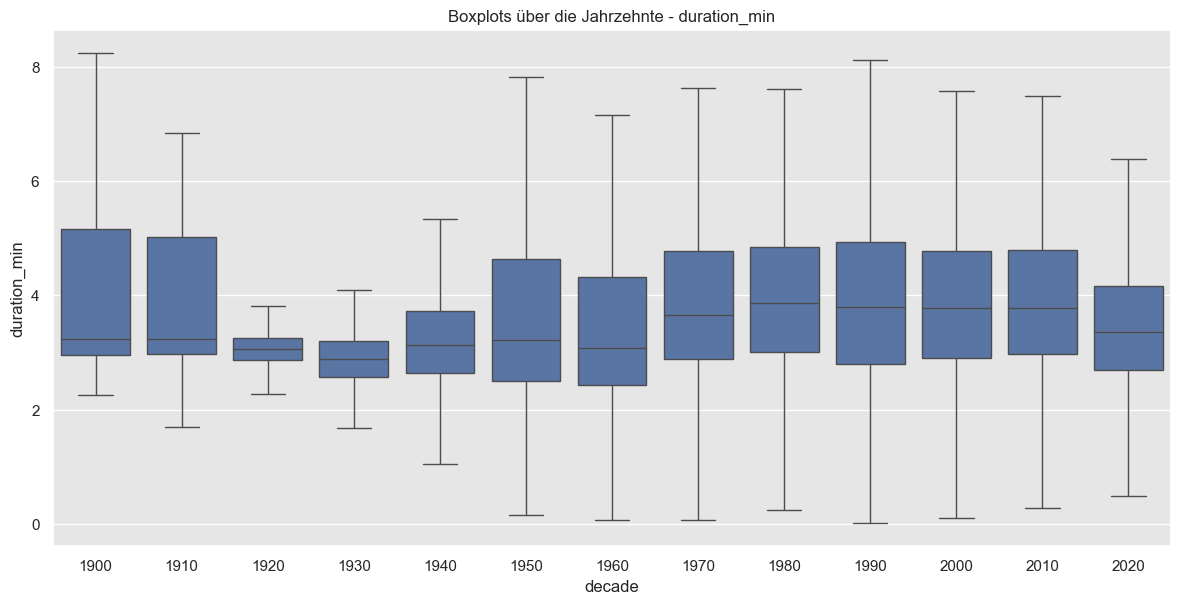

In [34]:
df.groupby(by="decade")["id"].nunique().plot(kind="bar")

features = ["danceability", "loudness", "speechiness", "tempo", "duration_min"]

for feature in features:
    Plots(df.loc[~df["decade"].isin([0])]).multi_boxplot(x_value="decade", y_value=feature, length=12,
                                                         title=f"Boxplots über die Jahrzehnte - {feature}",)

### Musical elements analysis

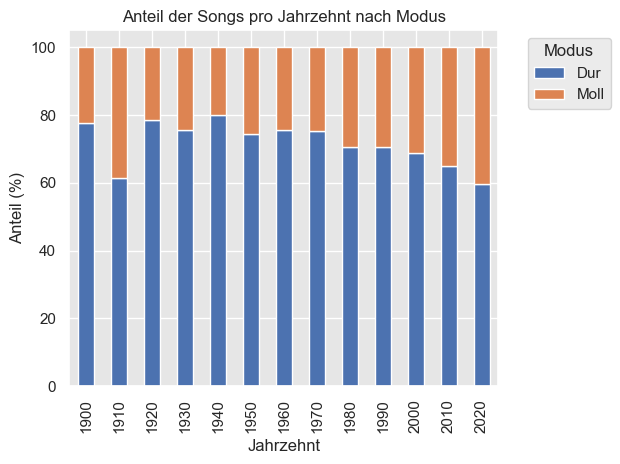

In [35]:
decade_mode_counts = df.loc[~df["decade"].isin([0])].groupby(['decade', 'Mode - Encoded'])['id'].nunique().unstack()

decade_mode_percentages = decade_mode_counts.div(decade_mode_counts.sum(axis=1), axis=0) * 100

ax = decade_mode_percentages.plot(kind="bar", stacked=True)
plt.title("Anteil der Songs pro Jahrzehnt nach Modus")
plt.xlabel("Jahrzehnt")
plt.ylabel("Anteil (%)")
ax.legend(title="Modus", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


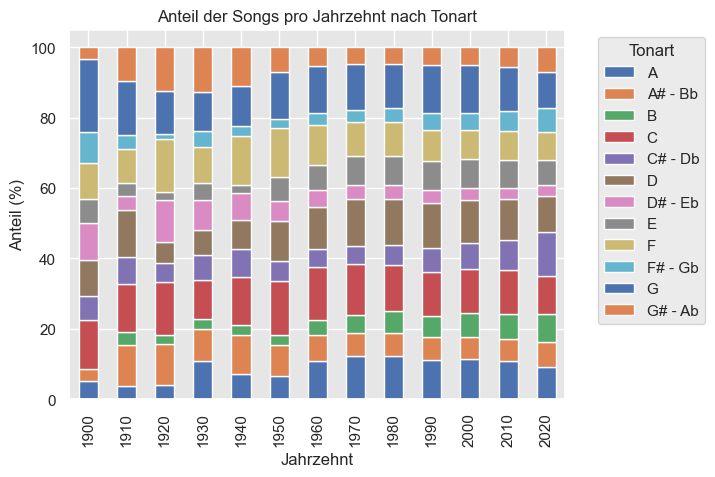

In [36]:
decade_key_counts =  df.loc[~df["decade"].isin([0])].groupby(['decade', 'Key - Encoded'])['id'].nunique().unstack()

decade_key_percentages = decade_key_counts.div(decade_key_counts.sum(axis=1), axis=0) * 100

ax = decade_key_percentages.plot(kind="bar", stacked=True)
plt.title("Anteil der Songs pro Jahrzehnt nach Tonart")
plt.xlabel("Jahrzehnt")
plt.ylabel("Anteil (%)")
ax.legend(title="Tonart", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


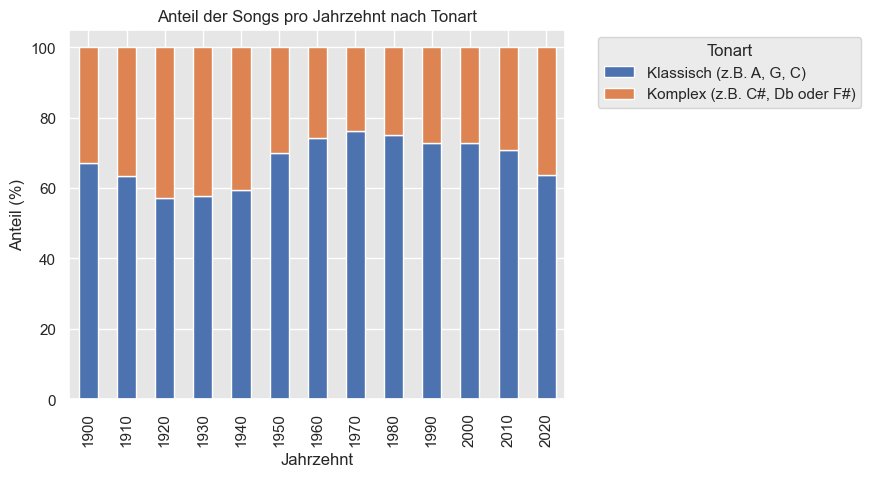

In [37]:
df["Key"] = df["Key - Encoded"].apply(lambda x: "Komplex (z.B. C#, Db oder F#)" if "#" in x else "Klassisch (z.B. A, G, C)")
decade_key_counts =  df.loc[~df["decade"].isin([0])].groupby(['decade', 'Key'])['id'].nunique().unstack()

decade_key_percentages = decade_key_counts.div(decade_key_counts.sum(axis=1), axis=0) * 100

ax = decade_key_percentages.plot(kind="bar", stacked=True)
plt.title("Anteil der Songs pro Jahrzehnt nach Tonart")
plt.xlabel("Jahrzehnt")
plt.ylabel("Anteil (%)")
ax.legend(title="Tonart", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


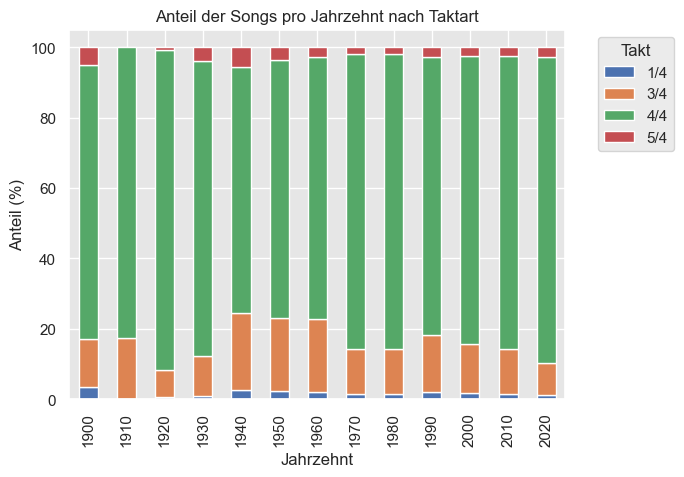

In [38]:
decade_timesig_counts =  df.loc[~df["decade"].isin([0])].groupby(['decade', 'Time_Signature - Encoded'])['id'].nunique().unstack()

decade_timesig_percentages = decade_timesig_counts.div(decade_timesig_counts.sum(axis=1), axis=0) * 100

ax = decade_timesig_percentages.plot(kind="bar", stacked=True)
plt.title("Anteil der Songs pro Jahrzehnt nach Taktart")
plt.xlabel("Jahrzehnt")
plt.ylabel("Anteil (%)")
ax.legend(title="Takt", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


### Histogramme

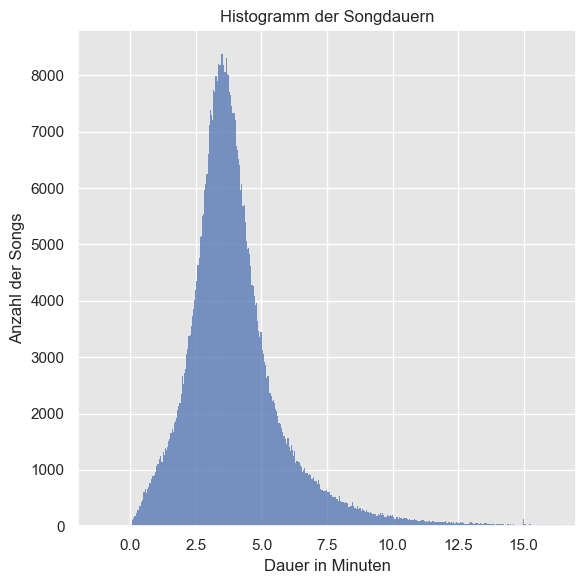

3.7886333333333333


In [39]:
Plots(df.loc[df["decade"].isin([2020, 2010])]).single_histogram(x_value="duration_min", title="Histogramm der Songdauern", x_title="Dauer in Minuten",
                           x_bot = -2, x_top=17, y_title="Anzahl der Songs")
print(df.loc[df["decade"].isin([1990])]["duration_min"].median())

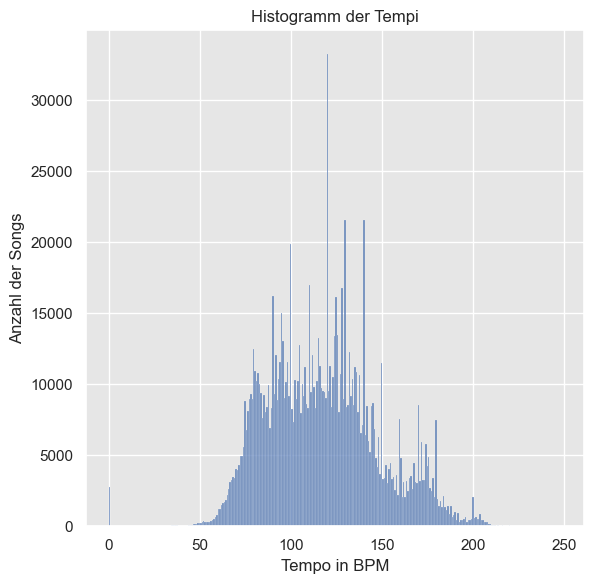

In [40]:
Plots(df).single_histogram(x_value="tempo", title="Histogramm der Tempi", x_title="Tempo in BPM", y_title="Anzahl der Songs")

# Data Set 3: Top Hits over the years

In [43]:
df = pd.read_csv("./data/top_hits.csv")

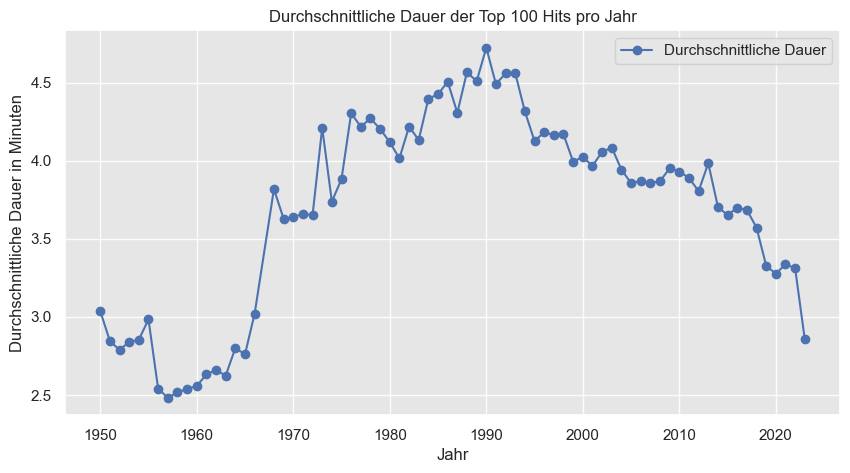

In [44]:
grouped_data = df.groupby(by="year").aggregate({"duration": "mean"})

plt.figure(figsize=(10, 5))
plt.plot(grouped_data.index, grouped_data["duration"], linestyle='-', 
         marker='o', color='b', label="Durchschnittliche Dauer")
plt.title("Durchschnittliche Dauer der Top 100 Hits pro Jahr")
plt.xlabel("Jahr")
plt.ylabel("Durchschnittliche Dauer in Minuten")
plt.grid(alpha=0.9)
plt.legend()

plt.show()
